### Echaremos un vistazo al modelo Lokta-Volterra, también conocido como
 ecuaciones depredador-presa, que son un par de primer orden, no lineal, diferencial
 ecuaciones frecuentemente usadas para describir la dinámica de los sistemas biológicos en
 que dos especies interactúan, una es un depredador y otra es su presa. Fueron propuestos
 de forma independiente por Alfred J. Lotka en 1925 y Vito Volterra en 1926:

Las ecuaciones son:

 $\frac{du}{dt} =  au -   buv$
   
  $\frac{dv}{dt} = -cv + dbuv$ 

Donde:

  $u$: numero de presas (En nuestro caso son los conejos)
 
  $v$: numero de depredadores (En nuestro caso son los zorros)  
   
  $a$, $b$, $c$, $d$ son parámetros constantes que definen el comportamiento de la población:    
 
  $a$ es la tasa de crecimiento natural de los conejos, cuando no hay zorros
 
  $b$  es tasa de muerte natural de los conejos, debido a la depredación
 
 $c$ es la tasa de muerte natural del zorro, cuando no hay conejos
 
   $d$ es el factor que describe cuántos conejos capturados permiten crear un nuevo zorro

In [23]:
from numpy import *
%matplotlib inline
import matplotlib.pyplot as plt


a = 1.
b = 0.1
c = 1.5
d = 0.75


In [18]:
def dX_dt(X, t=0):
    """ Tasa de conejos y de zorros """
    return array([ a*X[0] -   b*X[0]*X[1] ,  
                  -c*X[1] + d*b*X[0]*X[1] ])

In [19]:
##Equilibrio
X_f0 = array([     0. ,  0.])
X_f1 = array([ c/(d*b), a/b])
all(dX_dt(X_f0) == zeros(2) ) and all(dX_dt(X_f1) == zeros(2)) # => True 
##Estabilidad de los puntos fijos ===
# Cerca de estos dos puntos, el sistema puede linealizarse:
# dX_dt = A_f * X donde A es la matriz jacobiana evaluada en el punto correspondiente.
# Tenemos que definir la matriz jacobiana:
#

True

In [20]:
def d2X_dt2(X, t=0):
    """ Matriz jacobiana evaluada en X. """
    return array([[a -b*X[1],   -b*X[0]     ],
                  [b*d*X[1] ,   -c +b*d*X[0]] ]) 

In [21]:
A_f1 = d2X_dt2(X_f1)                    
#sacar eigvalues
lambda1, lambda2 = linalg.eigvals(A_f1) # >>> (1.22474j, -1.22474j)
T_f1 = 2*pi/abs(lambda1)                # >>> 5.130199
        

In [31]:
from scipy import integrate

t = linspace(0, 15,  1000)              # Tiempo
X0 = array([10, 5])                     # Condiciones iniciales 10 conejos , 5 zorros
X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)
infodict['message']                     
 
rabbits, foxes = X.T


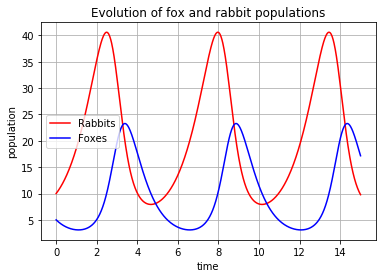

In [32]:

f1 = plt.figure()
plt.plot(t, rabbits, 'r-', label='Rabbits')
plt.plot(t, foxes  , 'b-', label='Foxes')
plt.grid()
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('population')
plt.title('Evolution of fox and rabbit populations')
plt.show()


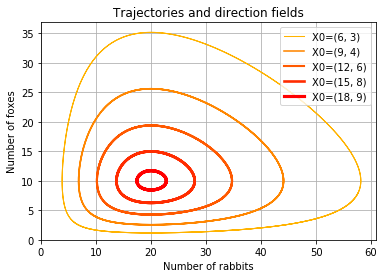

In [40]:
values  = linspace(0.3, 0.9, 5)                          
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values))) 

f2 = plt.figure()


for v, col in zip(values, vcolors): 
    X0 = v * X_f1                               
    X = integrate.odeint( dX_dt, X0, t)         
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1] 
nb_points   = 20                      

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       
DX1, DY1 = dX_dt([X1, Y1])                      
M = (hypot(DX1, DY1))                            
M[ M == 0] = 1.                                  
DX1 /= M                                        
DY1 /= M                                  


plt.title('Trajectories and direction fields')
##Q = plt.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
plt.xlabel('Number of rabbits')
plt.ylabel('Number of foxes')
plt.legend()
plt.grid()
plt.xlim(0, xmax)
plt.ylim(0, ymax)
plt.show()
